In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('USA_Housing.csv')
df

In [ ]:
X = df.drop(['Address','Price'], axis=1)
y = df['Price']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
ct = make_column_transformer(
    (MinMaxScaler(), ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population'])
)
ct.fit(X_train)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
X_train_normal

In [ ]:
X_test_normal

In [ ]:
X_train_normal.shape, X_test_normal.shape

In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
metrics=['mae'])

In [ ]:
history = model.fit(X_train,y_train, epochs=150)

In [ ]:
model.evaluate(X_test,y_test)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model2 = LinearRegression()
model2.fit(X_train, y_train)
model2.predict(X_test)

In [ ]:
y_pred.squeeze()

In [ ]:
model2.predict(X_test) - y_pred.squeeze()

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
from sklearn import metrics

In [ ]:
metrics.mean_absolute_error(y_test,y_pred)

In [ ]:
metrics.mean_absolute_error(y_test,model2.predict(X_test))

# Exercise 2

In [137]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression 

X , y  = make_regression(n_samples = 200 , 
                               n_features = 10, 
                               n_targets = 1)

X.shape , y.shape

((200, 10), (200,))

In [138]:
import pandas as pd
df = pd.DataFrame(data=X)
df

,0,1,2,3,4,5,6,7,8,9
0,1.507355,1.673911,-0.411283,1.429873,1.036930,-0.630836,0.957340,-0.329925,-0.369535,0.823559
1,1.558255,0.252199,1.078014,-1.047371,-0.869152,1.235432,-0.672079,0.700275,0.316266,0.245620
2,-1.643853,-2.238095,0.419868,-0.210447,0.416968,-0.136255,-1.676538,-0.786722,-0.679511,-0.522907
3,-0.608764,1.431747,0.746500,0.533127,2.221164,0.590407,-0.542897,-0.116295,-0.055885,-0.181781
4,1.499734,-1.385137,-0.471815,-1.543883,1.726364,-1.619989,1.029307,1.673481,-0.102174,0.490896
...,...,...,...,...,...,...,...,...,...,...
195,1.548049,0.479160,2.108288,-0.792224,2.003639,-1.600278,0.469740,-1.179333,0.996988,0.019182
196,-0.607102,-0.931685,-1.219047,-1.033051,-1.502285,-0.745434,0.022043,-0.268161,-0.635283,0.435465
197,0.977061,0.493807,-0.181236,-1.297154,0.611307,0.341483,0.658581,0.995409,-1.023836,-0.333078
198,1.086445,0.059697,0.434953,0.033485,0.323748,0.796150,0.121553,-0.447598,-0.173122,-0.574568


In [139]:
X.ndim

2

In [140]:
X[:, 0]

array([ 1.50735526,  1.55825506, -1.64385339, -0.60876394,  1.49973423,
       -0.00440079,  1.06403415, -0.63265834,  0.69004928, -0.14020901,
        0.05685532,  0.23692135,  0.37597823,  0.17342875,  0.51183123,
        2.5040555 ,  0.31730954,  0.53272106,  1.18328563, -0.70081489,
       -0.11092256, -1.05041361,  0.64160215,  0.20375355,  1.42783454,
        0.60758775, -0.49754935, -0.13895914,  1.34337783, -0.14336183,
       -0.38353334, -1.00578636,  0.14051692, -0.62860665, -0.42621205,
       -3.03713177, -0.5456447 , -0.46946193, -1.39425324, -1.26410484,
       -0.74680972, -0.40906956,  0.69226   , -0.10120675, -1.37440477,
        0.16002603, -0.57194733,  0.3234175 , -0.12145412, -0.94928749,
        0.33220995,  0.84091451, -1.67547327, -1.16618839, -1.19050929,
       -1.10763506,  1.04060242,  0.11763076, -0.51864425, -0.2997245 ,
        0.73207284, -0.07264523, -0.77351148,  0.09868462, -0.61678773,
        0.56906256,  0.30752925,  1.90206415, -0.90669269, -0.68

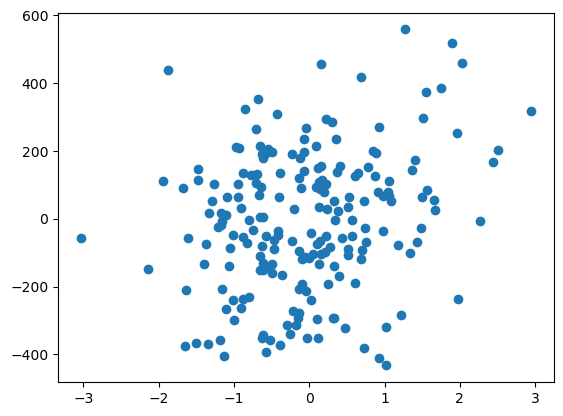

In [141]:
# Let's visualize the dataset for each feature

plt.scatter(X[:, 0] , y)


In [142]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [144]:
X_train.shape

(160, 10)

In [145]:
linear_model = LinearRegression()

In [146]:
linear_model.fit(X_train,y_train)
ylinear_pred = linear_model.predict(X_test)

In [147]:
ylinear_pred

array([-167.33340886,  202.89762152,  135.14907643,  233.99253625,
         79.70314311,   -7.87021614,  353.16699556,  -50.80830384,
       -138.18739617, -103.45954281,  284.86855762, -191.71786918,
        -88.54740585,   53.5241356 ,  -94.01156793,   65.70941339,
         79.53700131,  155.31546127,   92.94414793,   31.85959798,
        -74.66168219, -293.80085167, -131.2879238 ,    4.26519211,
        -51.75161006, -381.52261073, -340.73749772,  517.69361179,
       -370.52396496,   -7.92544669, -277.85514904,  -76.05455196,
       -266.71762896,  111.10334007,  460.06544559,  120.27087386,
        -56.84206147,  111.67225314,  190.36750155,  267.02461337])

In [148]:
metrics.mean_absolute_error(y_true=y_test, y_pred=ylinear_pred)

2.289723965986923e-13

In [149]:
# Let's build the model from scratch 
tf.random.set_seed(42)

# Creating the model 
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), 
  tf.keras.layers.Dense(50), 
  tf.keras.layers.Dense(1) # Should be always one 
])

# Compile the model 
model_1.compile(loss = tf.keras.losses.mae , 
               optimizer = tf.keras.optimizers.Adam() , 
                metrics = ['mae'])

# Fit the model 
history = model_1.fit(X_train , y_train , epochs = 100)

Epoch 1/100
5/5 [==============================] - 1s 2ms/step - loss: 165.6197 - mae: 165.6197
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 165.1121 - mae: 165.1121
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 164.5725 - mae: 164.5725
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 163.9772 - mae: 163.9772
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 163.2963 - mae: 163.2963
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 162.4818 - mae: 162.4818
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 161.4461 - mae: 161.4461
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 160.2358 - mae: 160.2358
Epoch 9/100
5/5 [==============================] - 0s 6ms/step - loss: 158.7861 - mae: 158.7861
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 157.1006 - mae: 157.1006
Epoch 11/100
5/5 [=====================

<AxesSubplot:>

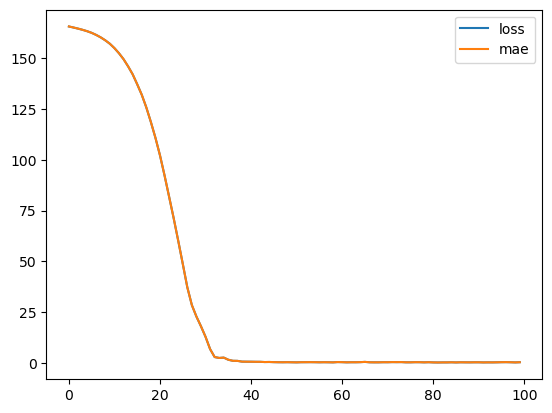

In [150]:
import pandas as pd
pd.DataFrame(history.history).plot()

In [151]:
model_1.evaluate(X_test,y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.5406 - mae: 0.5406


[0.5405629277229309, 0.5405629277229309]

In [152]:
y_pred = model_1.predict(X_test)

2/2 [==============================] - 0s 3ms/step


In [180]:
def plot_predictions(train_data,
                     train_labels, 
                     test_data,
                     test_labels, 
                     predictions):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend()

In [ ]:
X_train[: , 0]

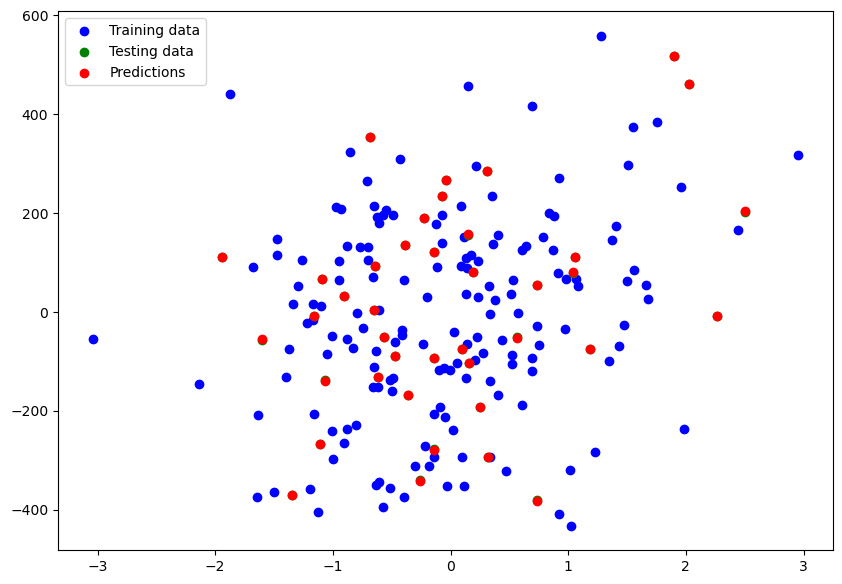

In [181]:
plot_predictions(X_train[: , 0], y_train, 
                 X_test[: , 0], y_test, 
                 y_pred)

In [182]:
ylinear_pred - y_pred

array([[ 2.39741773e-01,  3.70470772e+02,  3.02722227e+02, ...,
         2.79245404e+02,  3.57940652e+02,  4.34597764e+02],
       [-3.70497166e+02, -2.66135809e-01, -6.80146809e+01, ...,
        -9.14915042e+01, -1.27962558e+01,  6.38608560e+01],
       [-3.03250081e+02,  6.69809498e+01, -7.67595324e-01, ...,
        -2.42444186e+01,  5.44508298e+01,  1.31107942e+02],
       ...,
       [-2.78699490e+02,  9.15315403e+01,  2.37829952e+01, ...,
         3.06171902e-01,  7.90014203e+01,  1.55658532e+02],
       [-3.57805348e+02,  1.24256824e+01, -5.53228627e+01, ...,
        -7.87996859e+01, -1.04437541e-01,  7.65526743e+01],
       [-4.34570103e+02, -6.43390728e+01, -1.32087618e+02, ...,
        -1.55564441e+02, -7.68691928e+01, -2.12080963e-01]])